# Superposition and Entanglement in Qiskit
This notebook demonstrates:
1. **Superposition** using a single qubit.
2. **Entanglement** using two qubits.
We will use Qiskit to create circuits, visualize the states, and measure outcomes.

In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 103.3 MB/s eta 0:00:00


In [2]:
# ===========================
# Import Libraries
# ===========================
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt


## 1. Superposition Example

In [3]:
# ===========================
# Superposition Example
# ===========================
# Create 1-qubit circuit
qc_super = QuantumCircuit(1)

# Apply Hadamard gate to create superposition
qc_super.h(0)

# Draw the circuit
qc_super.draw('text')

# Get statevector
state_super = Statevector.from_instruction(qc_super)
plot_bloch_multivector(state_super)
plt.show()

# Measure and simulate
qc_super.measure_all()
simulator = AerSimulator()
job_super = simulator.run(qc_super, shots=1024)
result_super = job_super.result()
counts_super = result_super.get_counts()
print("Superposition Measurement Counts:", counts_super)
plot_histogram(counts_super)
plt.show()

Superposition Measurement Counts: {'0': 490, '1': 534}


## 2. Entanglement Example

In [4]:
# ===========================
# Entanglement Example
# ===========================
# Create 2-qubit circuit
qc_ent = QuantumCircuit(2)

# Apply Hadamard on qubit 0
qc_ent.h(0)

# Apply CNOT to entangle qubit 0 and 1
qc_ent.cx(0, 1)

# Draw the circuit
qc_ent.draw('text')

# Get statevector
state_ent = Statevector.from_instruction(qc_ent)
print("Entangled Statevector:", state_ent)
plot_bloch_multivector(state_ent)
plt.show()

# Measure and simulate
qc_ent.measure_all()
job_ent = simulator.run(qc_ent, shots=1024)
result_ent = job_ent.result()
counts_ent = result_ent.get_counts()
print("Entanglement Measurement Counts:", counts_ent)
plot_histogram(counts_ent)
plt.show()

Entangled Statevector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
Entanglement Measurement Counts: {'00': 527, '11': 497}


In [5]:
# ===========================
# Summary of Results
# ===========================
print("✅ Summary:")
print("\n1️⃣ Superposition Example:")
print("   - The qubit was placed in a superposition using a Hadamard gate.")
print("   - Measurement results showed roughly 50% |0⟩ and 50% |1⟩.")
print("   - This means the qubit existed in both states until measured.\n")

print("2️⃣ Entanglement Example:")
print("   - Two qubits were entangled using Hadamard + CNOT gates.")
print("   - Measurement results showed correlated outcomes (00 and 11).")
print("   - This means the qubits share quantum information — measuring one affects the other.")


✅ Summary:

1️⃣ Superposition Example:
   - The qubit was placed in a superposition using a Hadamard gate.
   - Measurement results showed roughly 50% |0⟩ and 50% |1⟩.
   - This means the qubit existed in both states until measured.

2️⃣ Entanglement Example:
   - Two qubits were entangled using Hadamard + CNOT gates.
   - Measurement results showed correlated outcomes (00 and 11).
   - This means the qubits share quantum information — measuring one affects the other.


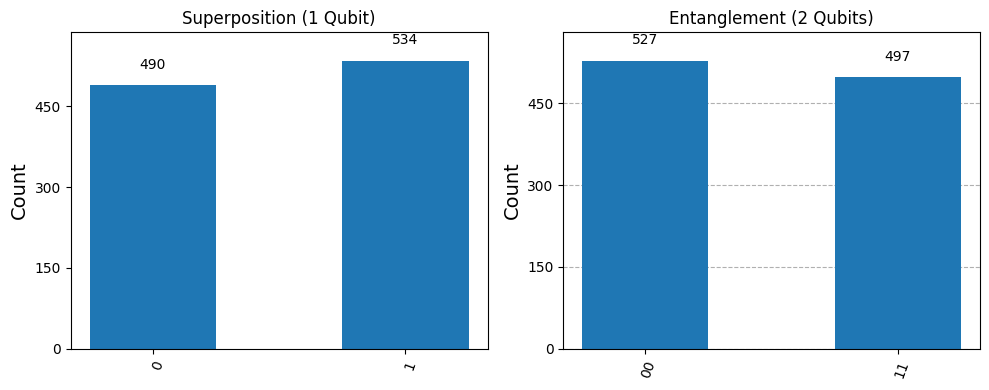

In [6]:
# ===========================
# Compare Both Results
# ===========================
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

plot_histogram(counts_super, ax=axs[0])
axs[0].set_title("Superposition (1 Qubit)")

plot_histogram(counts_ent, ax=axs[1])
axs[1].set_title("Entanglement (2 Qubits)")

plt.tight_layout()
plt.show()
